# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [1]:
import matplotlib.pyplot as plt

import fastf1.plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

# load a session and its telemetry data
session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (412.49 MB) /home/rylei/.cache/fastf1
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', '6', '9']


First, we select the two laps that we want to compare



In [2]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [3]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



req            INFO 	Using cached data for driver_info


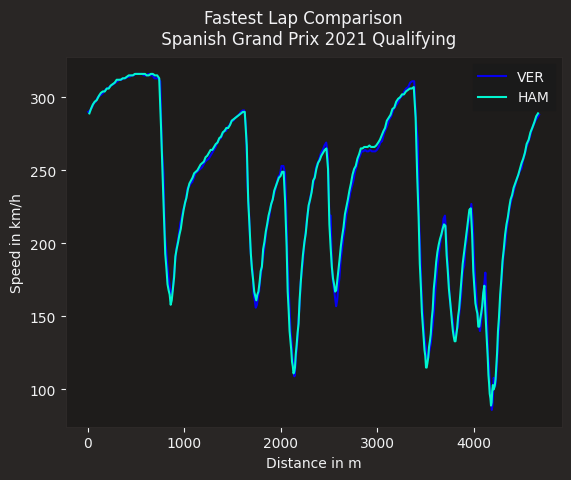

In [4]:
rbr_color = fastf1.plotting.get_team_color(ver_lap['Team'], session=session)
mer_color = fastf1.plotting.get_team_color(ham_lap['Team'], session=session)

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()